In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from datetime import datetime
import os
from unidecode import unidecode

In [16]:
files = ['hurto-personas-' + str(i) + '.xlsx' for i in range(2010, 2017)]+['hurto-personas-' + str(i) +'_primera_parte'+'.xlsx' for i in range(2017, 2020)] +['hurto-personas-' + str(i) +'_segunda_parte'+'.xlsx' for i in range(2017, 2020)]
all_dfs = []

for file in files:
    temp = pd.read_excel(file)
    
    # Eliminar acentos en el nombre de las columnas
    temp.columns = [unidecode(str(col)) for col in temp.columns]

    # Reemplazar espacios por _
    temp.columns = temp.columns.str.replace(' ', '_')
    
    # Strip
    temp.columns = temp.columns.str.strip()

    # Reemplazar espacios por _
    temp.columns = temp.columns.str.lower()

#     Reemplazar NaN, None
    temp.replace('-', np.nan, inplace=True)

    # Set axis name
    temp.rename_axis('id', inplace=True)
    
    all_dfs.append(temp)

In [17]:
renaming={
    'clase_sitio':'clase_de_sitio',
    'pais_nace':'pais_de_nacimiento',
    'clase_empleado':'clase_de_empleado'
}

for i in range(len(all_dfs)):
    all_dfs[i].rename(columns=renaming, inplace=True)
    
df_f = pd.concat(all_dfs, axis=0)
#df_f.drop(columns=['2012','2010','2011'], inplace=True)

In [18]:
df_f.columns

Index(['fecha', 'departamento', 'municipio', 'dia', 'hora', 'barrio', 'zona',
       'clase_de_sitio', 'arma_empleada', 'movil_agresor', 'movil_victima',
       'edad', 'sexo', 'estado_civil', 'pais_de_nacimiento',
       'clase_de_empleado', 'profesion', 'escolaridad', 'codigo_dane',
       'cantidad'],
      dtype='object')

In [19]:
df_f.shape

(1412808, 20)

In [20]:
df_f.edad.unique()
df_f.edad.replace('NO REPORTADO', np.nan, inplace=True)
df_f.edad = df_f.edad.astype(float)
df_f.municipio.replace(' \(CT\)', '', regex=True, inplace=True)

In [21]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
# mpl.rcParams.keys()

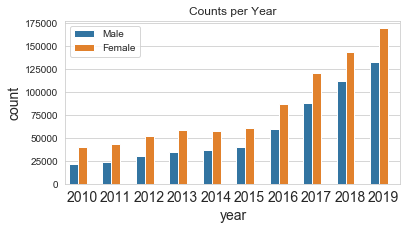

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,3))
ax = sns.countplot(
    data=df_f.assign(year = lambda df: df.fecha.dt.year),
    x='year',
    hue='sexo'
)

ax.set_title('Counts per Year');
ax.legend(['Male', 'Female']);

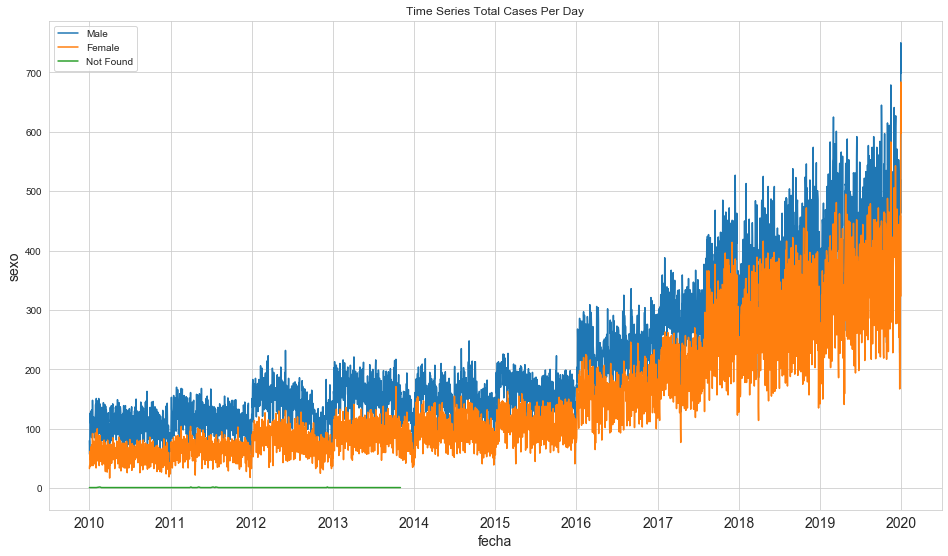

In [24]:
plt.figure(figsize=(16,9))
ax = sns.lineplot(
    data=df_f.groupby('fecha').apply(lambda df: df.sexo.value_counts()).reset_index(),
    x='fecha',
    y='sexo',
    hue='level_1'
)

ax.set_title('Time Series Total Cases Per Day');
ax.legend(['Male', 'Female', 'Not Found']);

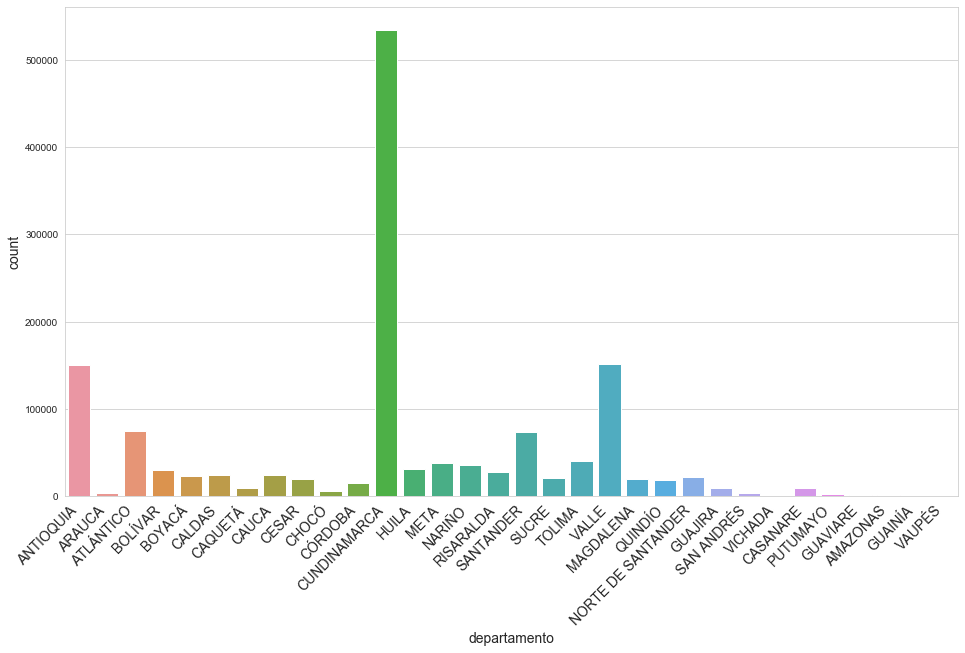

In [25]:
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_f,
    x='departamento'
)

plt.xticks(rotation=45,ha='right');

Text(0.5, 0, 'Day')

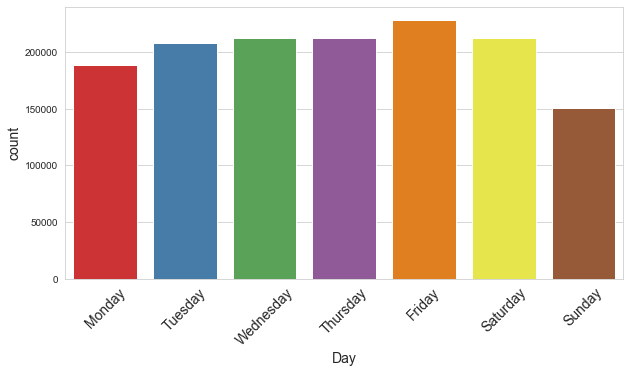

In [78]:
plt.figure(figsize=(10,5))

order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
ax = sns.countplot(
    data=df_f,
    x='dia',
    order=order
)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
ax.set_xlabel('Day')

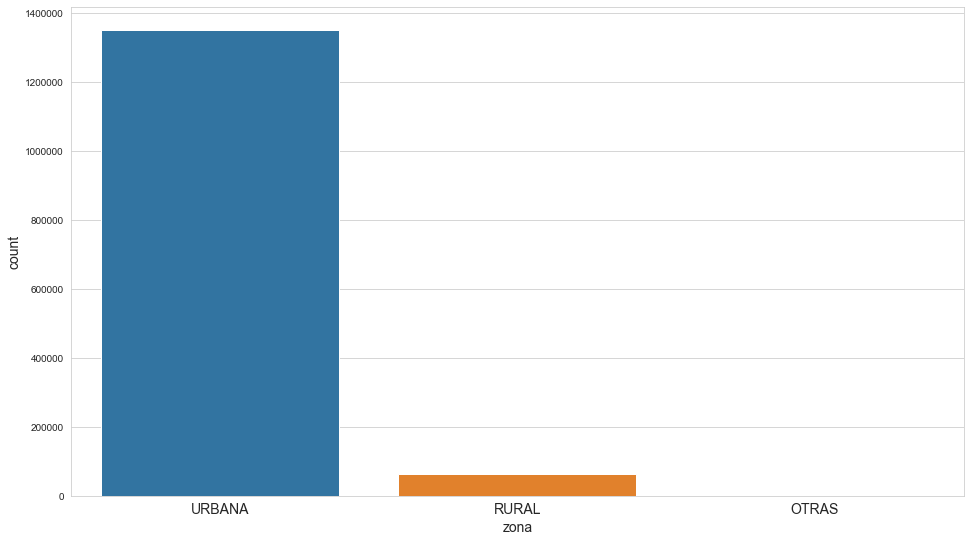

In [27]:
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_f,
    x='zona',
)


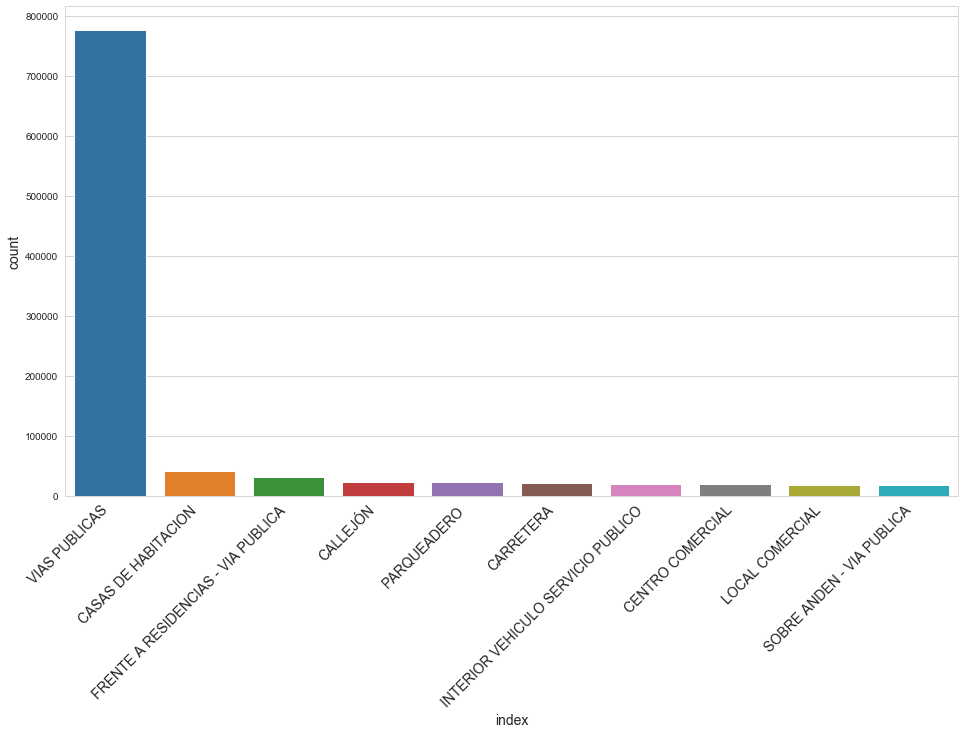

In [28]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_f.clase_de_sitio.value_counts().head(10).to_frame(name='count').reset_index(),
    x='index',
    y='count'
) 

plt.xticks(rotation=45, ha='right');

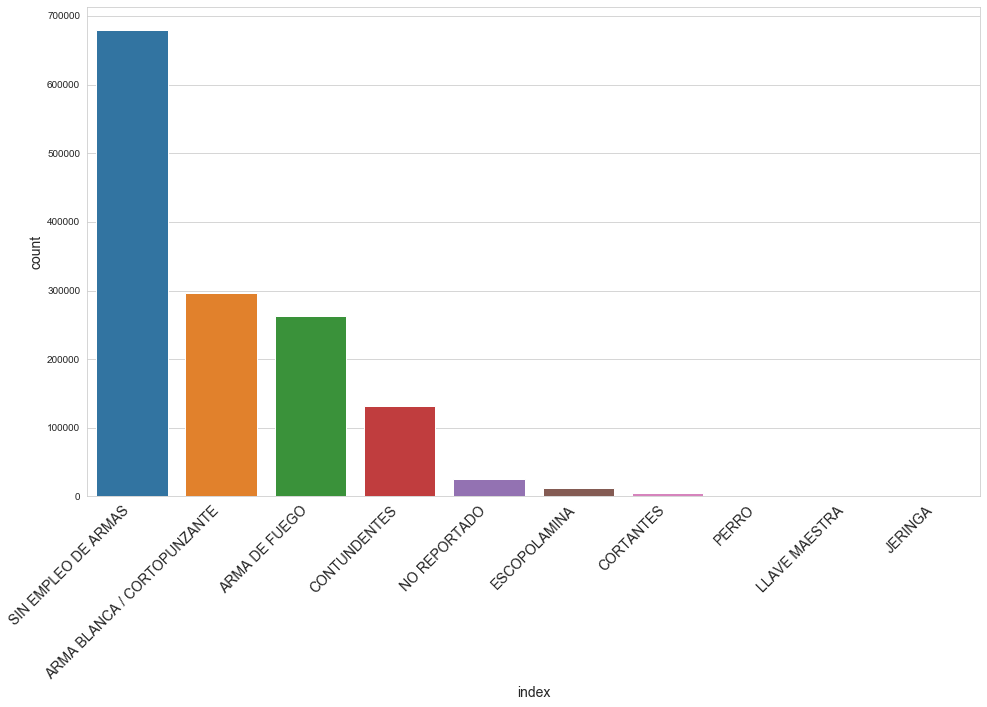

In [29]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_f.arma_empleada.value_counts().head(10).to_frame(name='count').reset_index(),
    x='index',
    y='count'
) 

plt.xticks(rotation=45, ha='right');

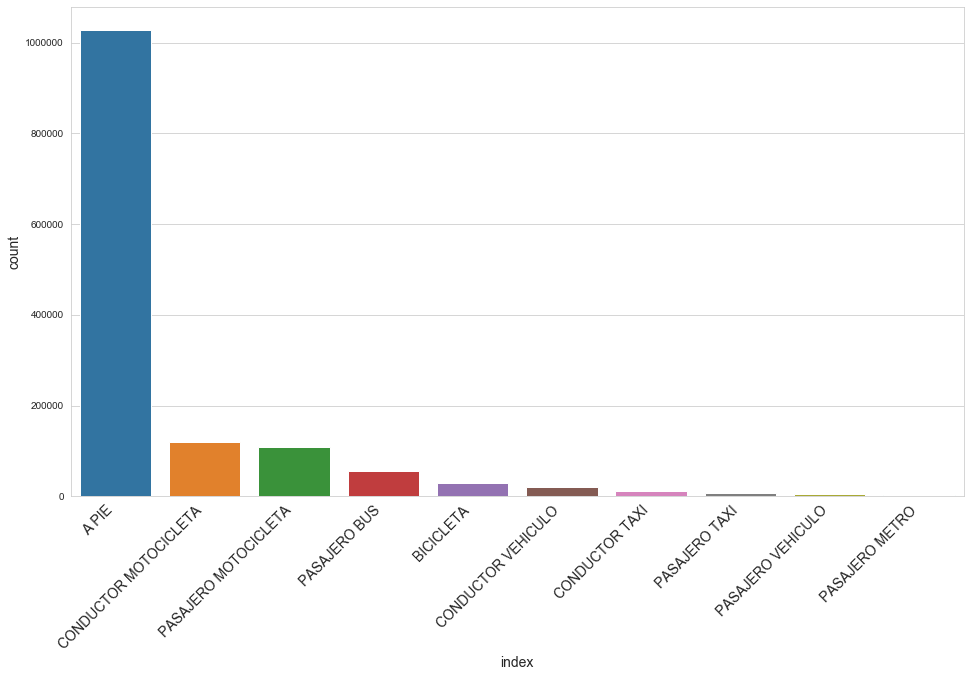

In [30]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_f.movil_agresor.value_counts().head(10).to_frame(name='count').reset_index(),
    x='index',
    y='count'
) 

plt.xticks(rotation=45, ha='right');

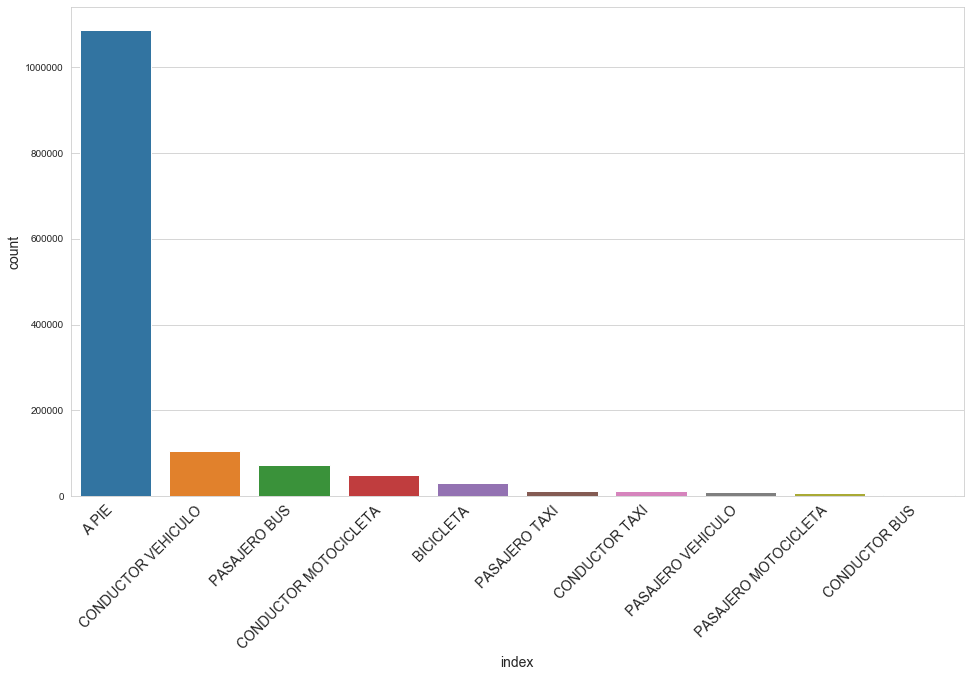

In [31]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_f.movil_victima.value_counts().head(10).to_frame(name='count').reset_index(),
    x='index',
    y='count'
) 

plt.xticks(rotation=45, ha='right');

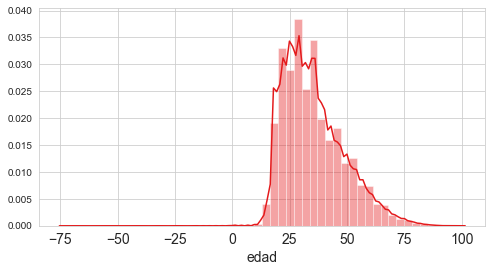

In [68]:
plt.figure(figsize=(8,4))

sns.distplot(
    df_f[df_f['edad']<100]['edad']
);

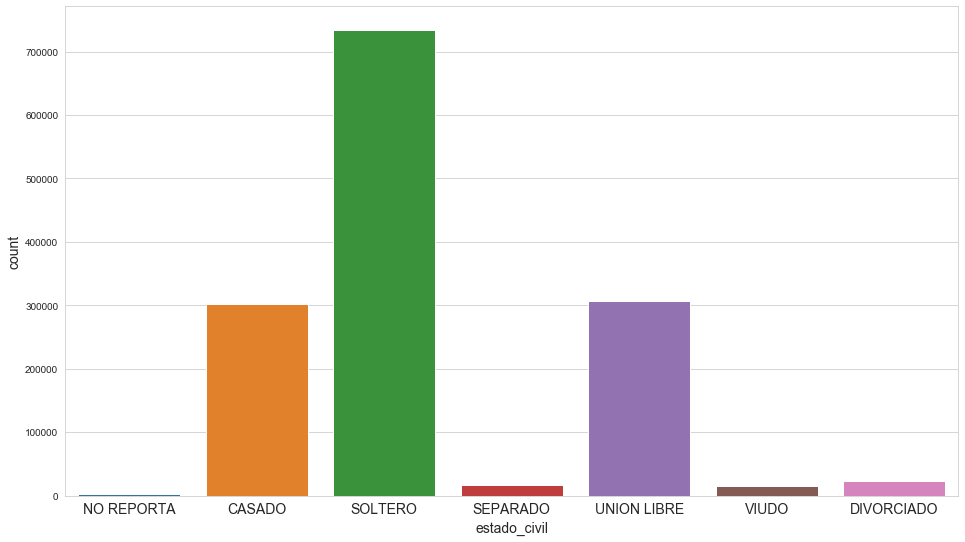

In [33]:
plt.figure(figsize=(16,9))

sns.countplot(
    data=df_f,
    x='estado_civil',
);

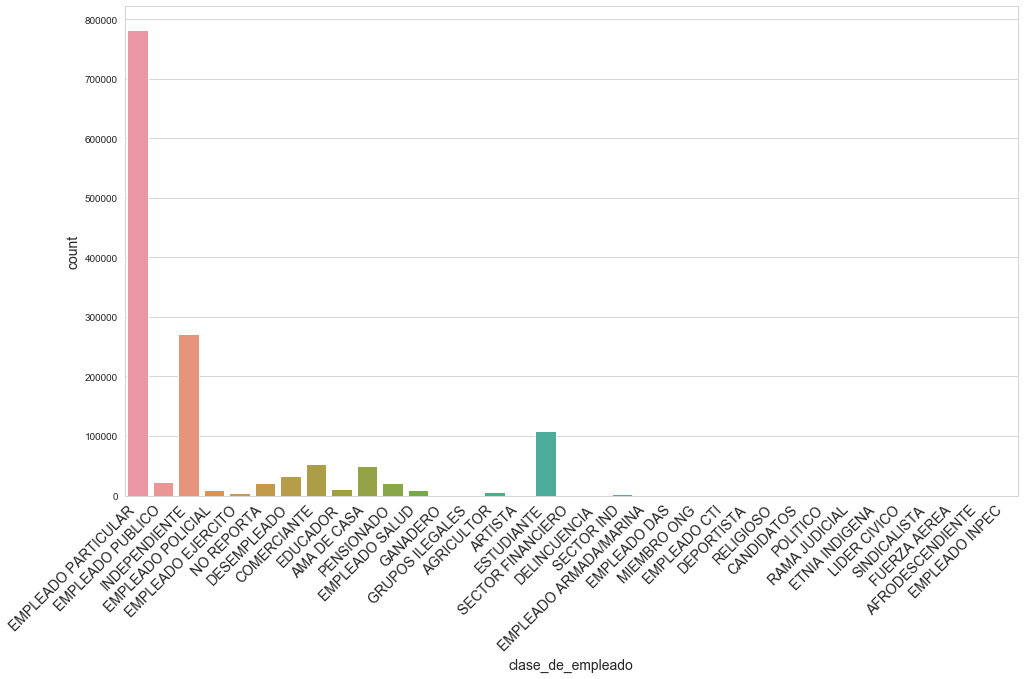

In [34]:
plt.figure(figsize=(16,9))

sns.countplot(
    data=df_f,
    x='clase_de_empleado',
) 

plt.xticks(rotation=45, ha='right');

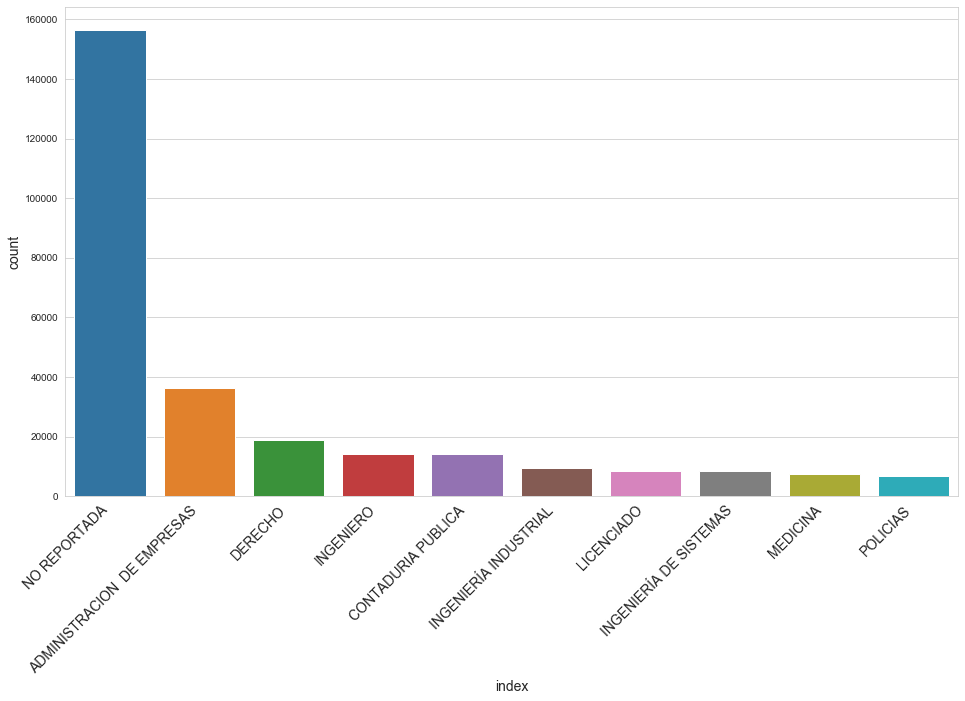

In [35]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_f.profesion.value_counts().to_frame('count').reset_index().head(10),
    x='index',
    y='count'
) 

plt.xticks(rotation=45, ha='right');

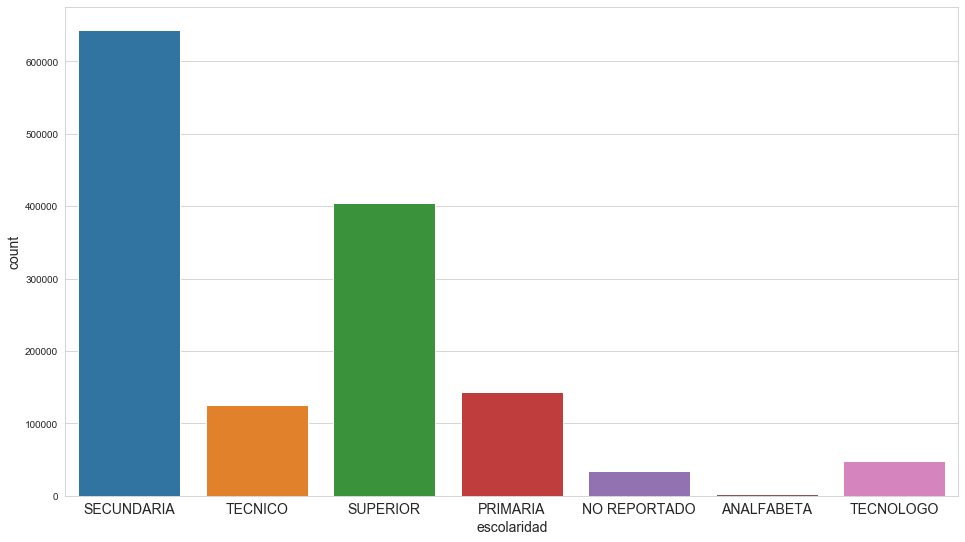

In [36]:
plt.figure(figsize=(16,9))

sns.countplot(
    data=df_f,
    x='escolaridad',
);

In [37]:
df_f.hora = pd.to_datetime(df_f.hora, format='%H:%M:%S')
df_f['year'] = df_f.fecha.dt.year
df_f['hora_int'] = df_f.hora.dt.hour

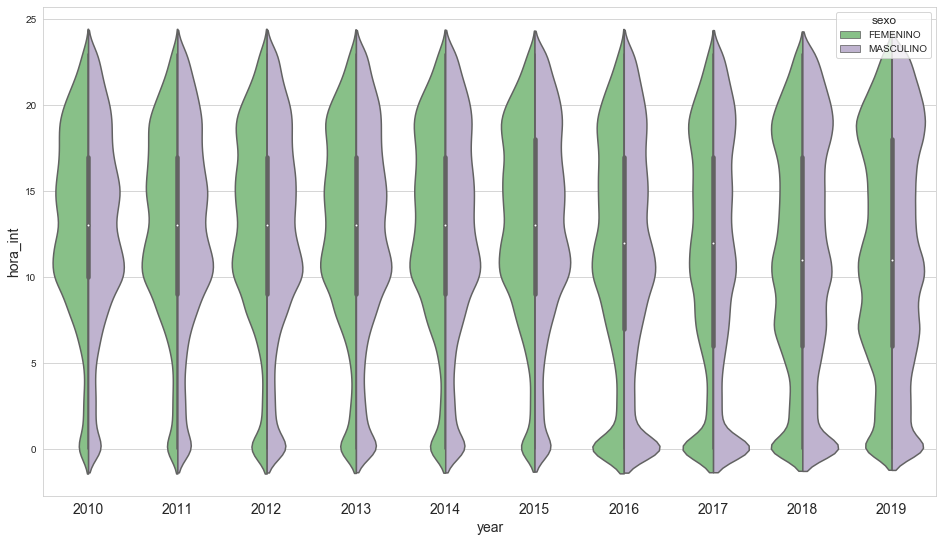

In [38]:
sns.set_palette('Set1')
fig, ax = plt.subplots(figsize=(16,9))
sns.violinplot(
    data=df_f[df_f.sexo != "NO REPORTA"],
    x='year',
    y='hora_int',
    hue='sexo',
    ax=ax,
    split=True,
    palette="Accent"
);

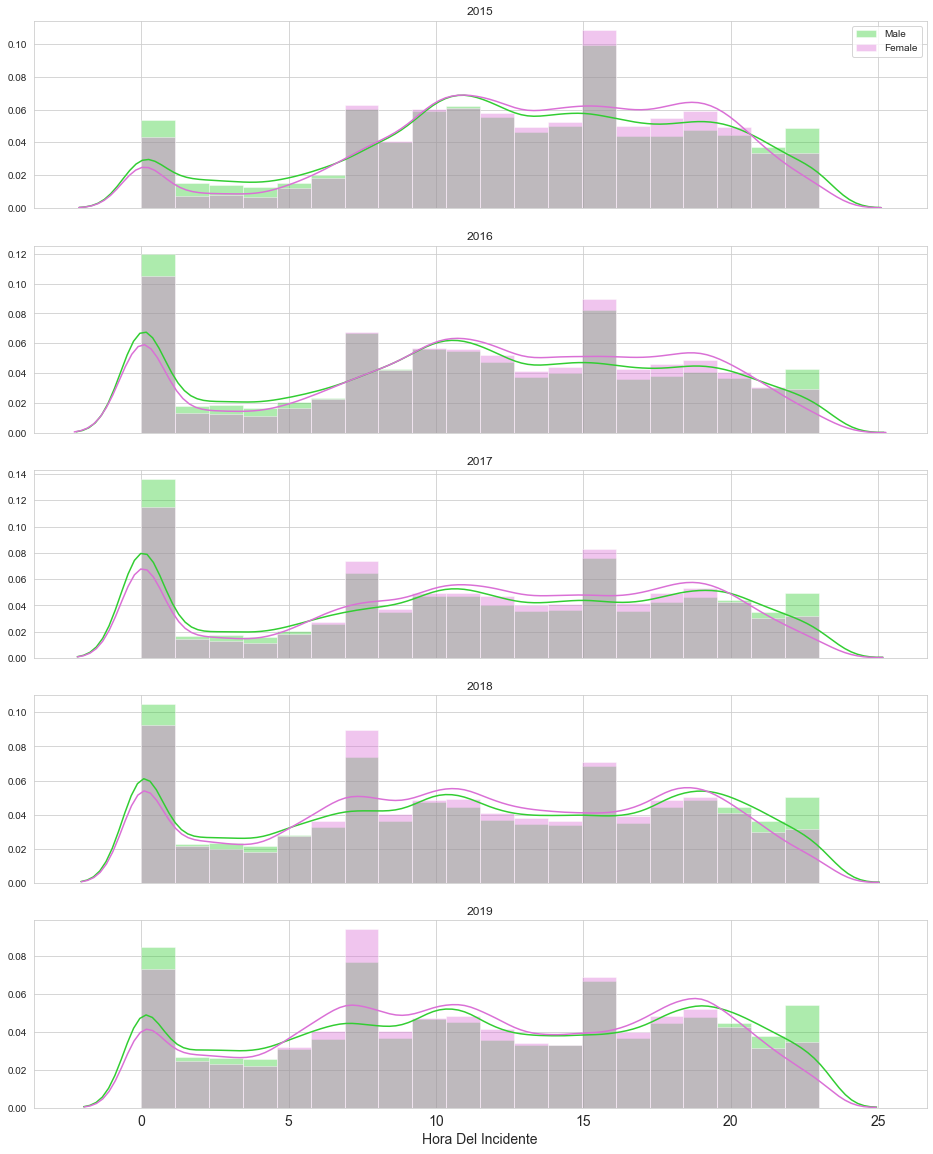

In [39]:
fig, ax = plt.subplots(5, 1, figsize=(16,20), sharex=True)
i=0
for year in np.arange(2015,2020):
    sns.distplot(
        df_f.loc[((df_f.sexo == 'MASCULINO') & (df_f.year == year)), 'hora_int'],
        bins=20,
        color='limegreen',
        label='Male',
        ax=ax[i]
    )

    sns.distplot(
        df_f.loc[((df_f.sexo == 'FEMENINO') & (df_f.year == year)), 'hora_int'],
        bins=20,
        color='orchid',
        label='Female',
        ax=ax[i]
    )
    ax[i].set_title(str(year))
    ax[i].set_xlabel('')
    i+=1

ax[0].legend()
ax[-1].set_xlabel('Hora Del Incidente');

In [53]:
df_f.edad.max()

411.0

In [58]:
df_f[df_f['edad']<0]['edad']

id
64065     -1.0
61048    -73.0
61891    -72.0
92998    -24.0
117430   -54.0
Name: edad, dtype: float64

In [71]:
df_f.departamento.value_counts()

CUNDINAMARCA          534448
VALLE                 151617
ANTIOQUIA             150488
ATLÁNTICO              74703
SANTANDER              72885
TOLIMA                 39941
META                   37307
NARIÑO                 34952
HUILA                  30633
BOLÍVAR                29956
RISARALDA              27869
CAUCA                  24514
CALDAS                 24062
BOYACÁ                 22567
NORTE DE SANTANDER     21947
SUCRE                  20543
CESAR                  19464
MAGDALENA              19216
QUINDÍO                18069
CÓRDOBA                14951
CAQUETÁ                 9227
GUAJIRA                 8754
CASANARE                8557
CHOCÓ                   5472
ARAUCA                  3075
SAN ANDRÉS              2871
PUTUMAYO                2462
AMAZONAS                 838
GUAVIARE                 566
GUAINÍA                  405
VICHADA                  333
VAUPÉS                   115
Name: departamento, dtype: int64

In [70]:
df_f.departamento.shape

(1412808,)